## About this data

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 


The features are:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("housing.csv")
data = dataset.copy()
pd.set_option('mode.chained_assignment', None)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
# One hot encoding ocean_proximity:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [5]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop('ocean_proximity', axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [7]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  uint8  
 10  INLAND              20433 non-null  uint8  
 11  ISLAND              20433 non-null  uint8  
 12  NEAR BAY            20433 non-null  uint8  
 13  NEAR OCEAN          20433 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.7 MB


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


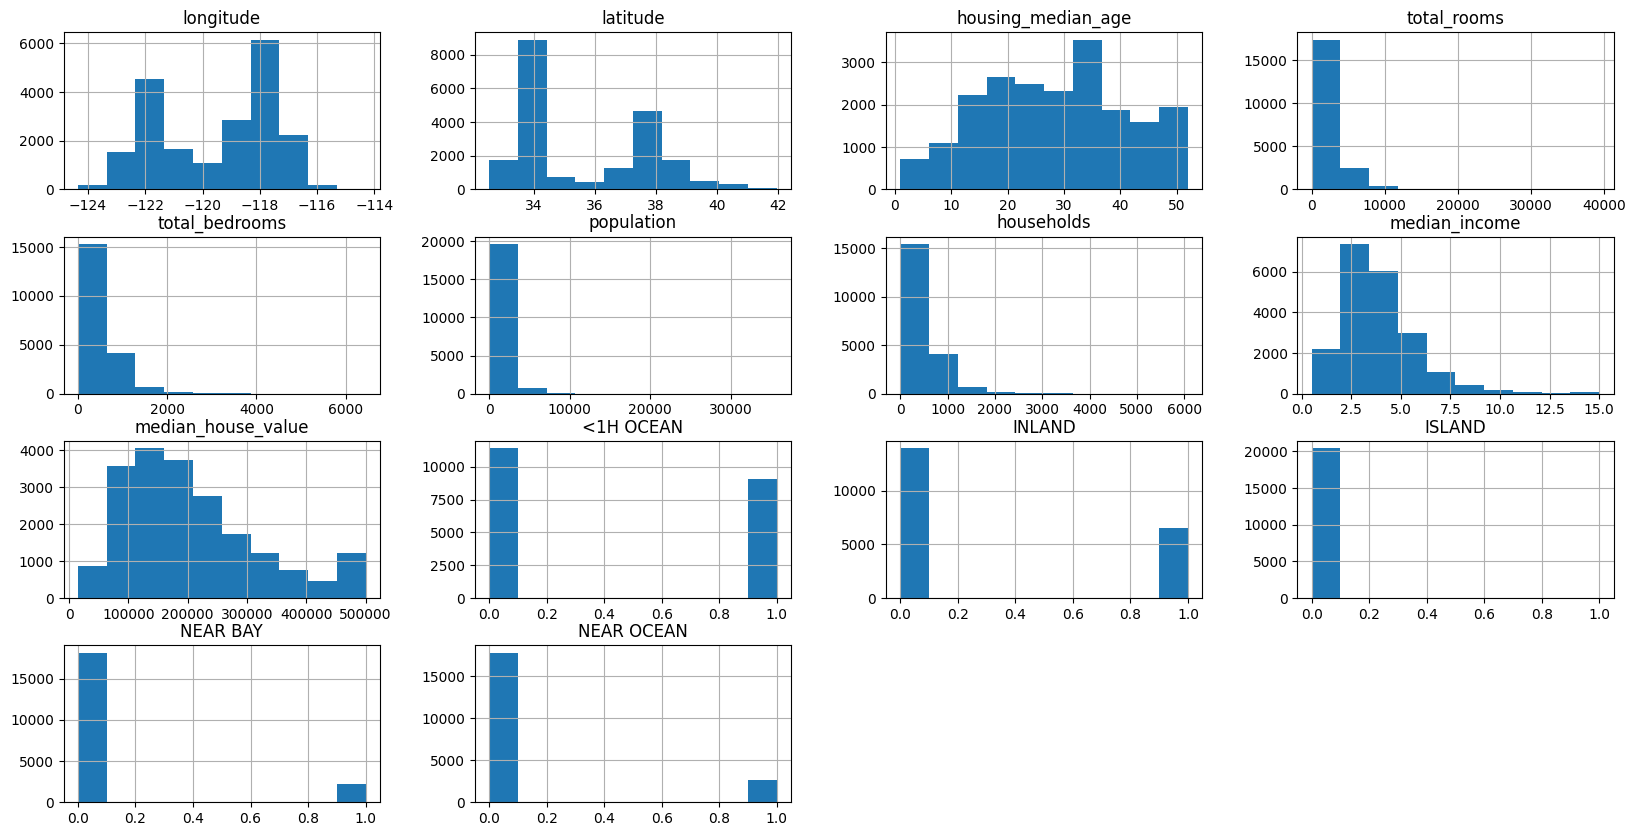

In [9]:
data.hist(figsize=(20,10))
plt.show()

Replace the varibles in ocean proximity to numeric variables

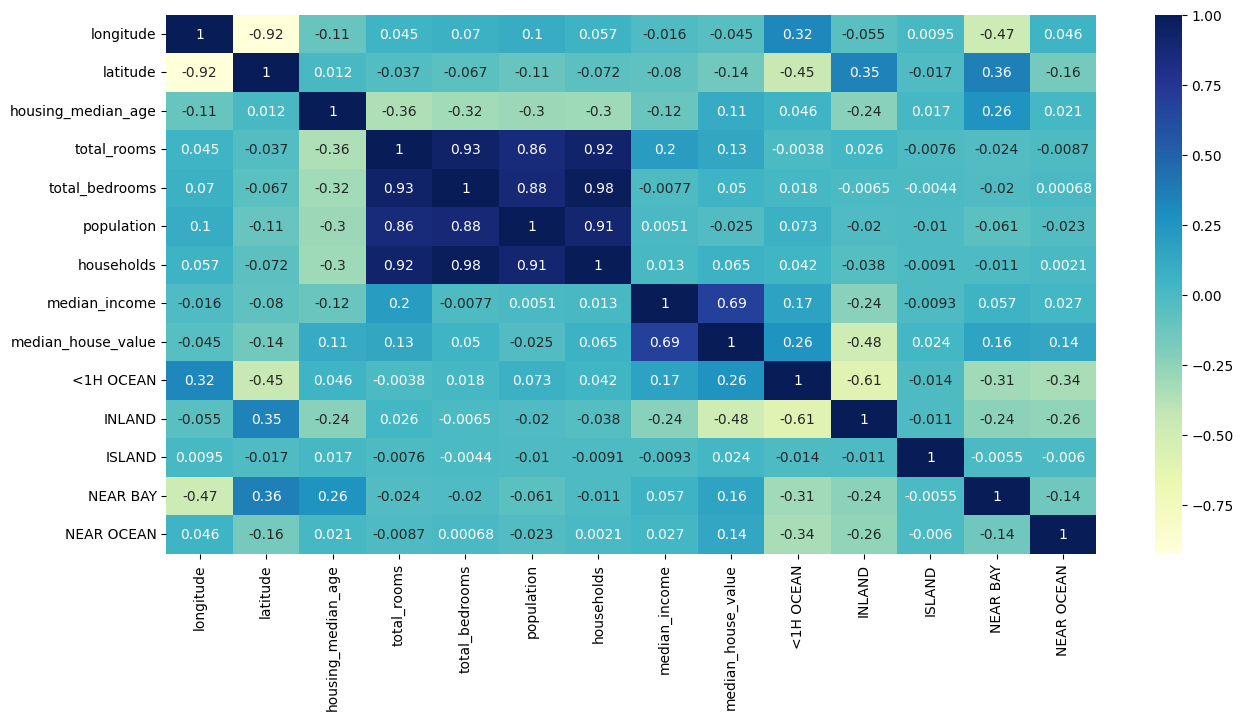

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## feature engineering

In [11]:
data["bedroom_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["rooms_per_household"]=data["total_rooms"]/data["households"]

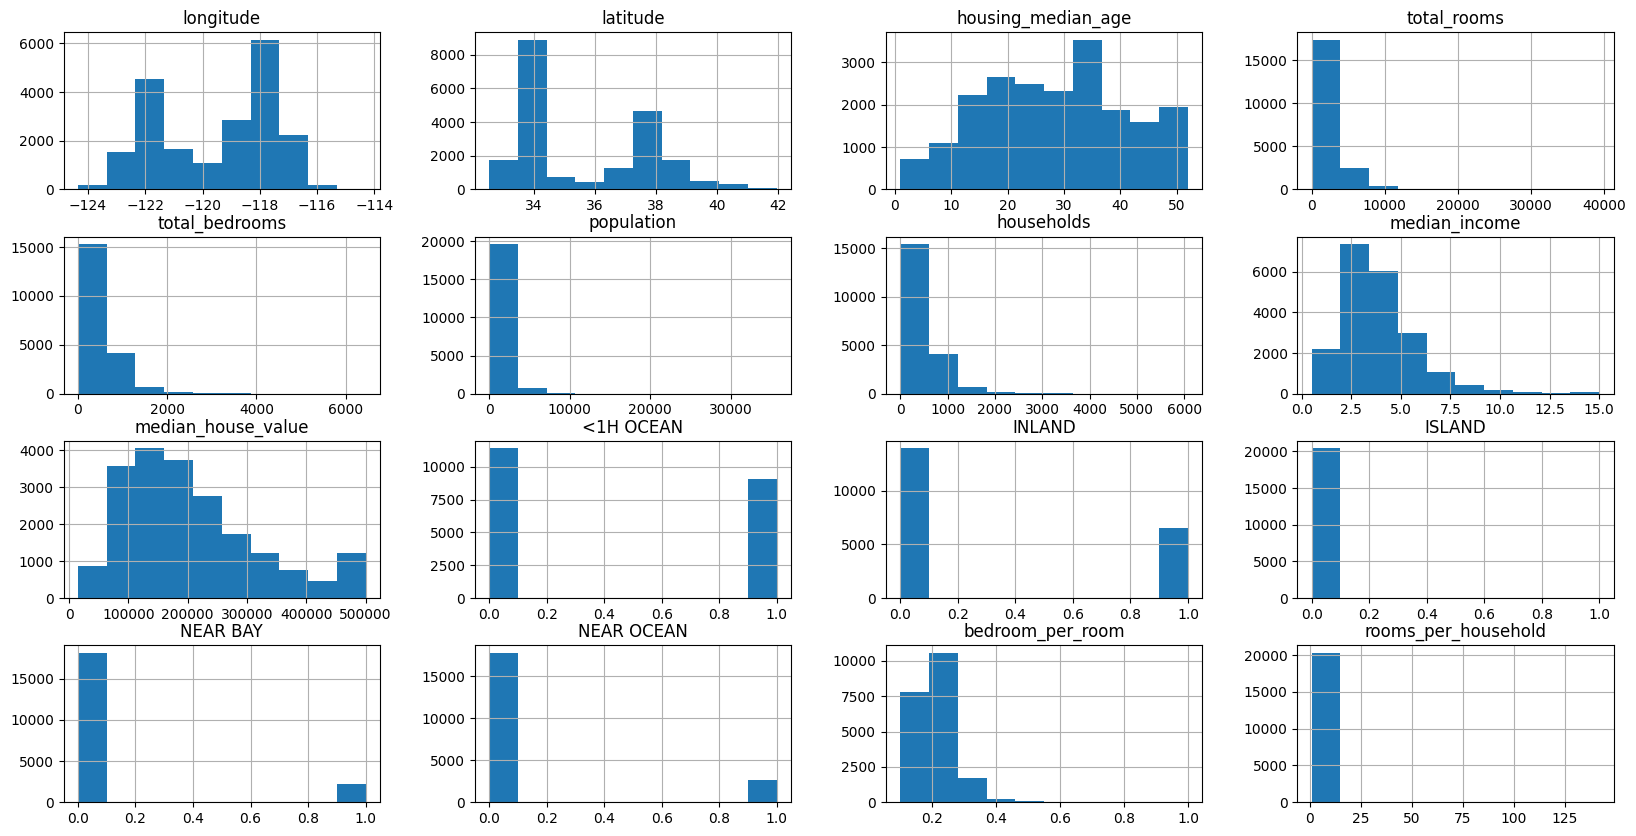

In [12]:
data.hist(figsize=(20,10))
plt.show()

## log transformation

## maybe shouldnt do this to test data? standard scaler??

In [13]:
columns_list = ['total_rooms','total_bedrooms','population','households',"bedroom_per_room","rooms_per_household"]
for column in columns_list:
    data[column]=np.log(data[column]+1)
# data['total_rooms'] = np.log(data['total_rooms']+1)
# data['total_bedrooms'] = np.log(data['total_rooms']+1)
# data['population'] = np.log(data['population']+1)
# data['households'] = np.log(data['households']+1)
# data["bedroom_per_room"] = np.log(data["bedroom_per_room"]+1)
# data["rooms_per_household"] = np.log(data["rooms_per_household"]+1)

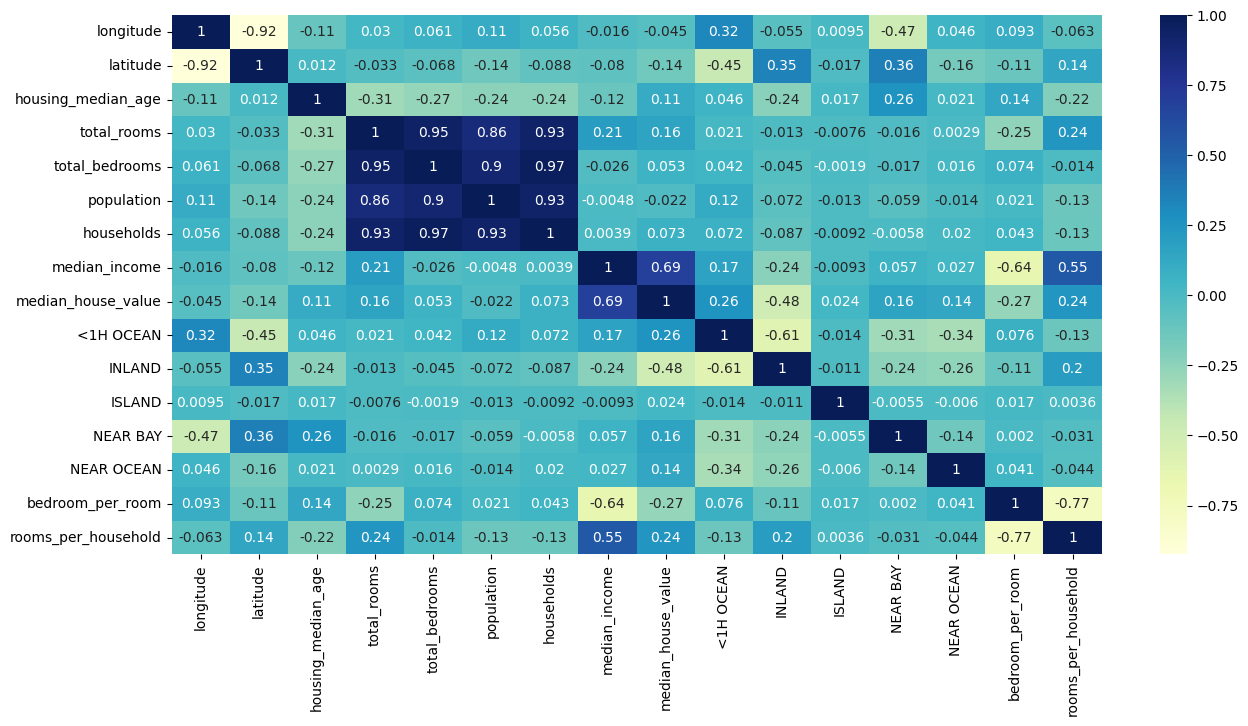

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

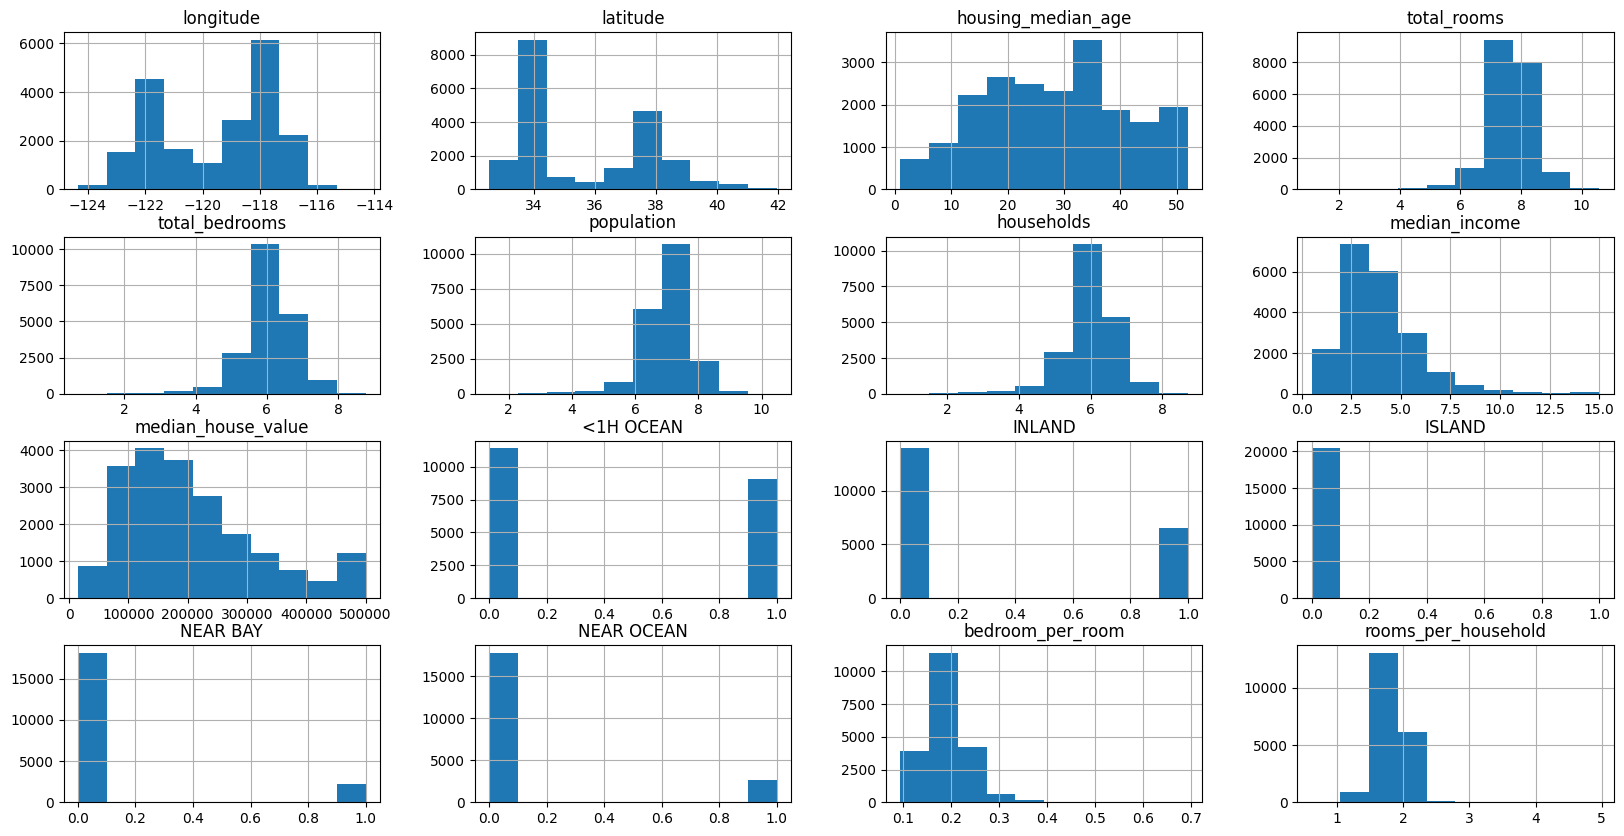

In [15]:
data.hist(figsize=(20,10))
plt.show()

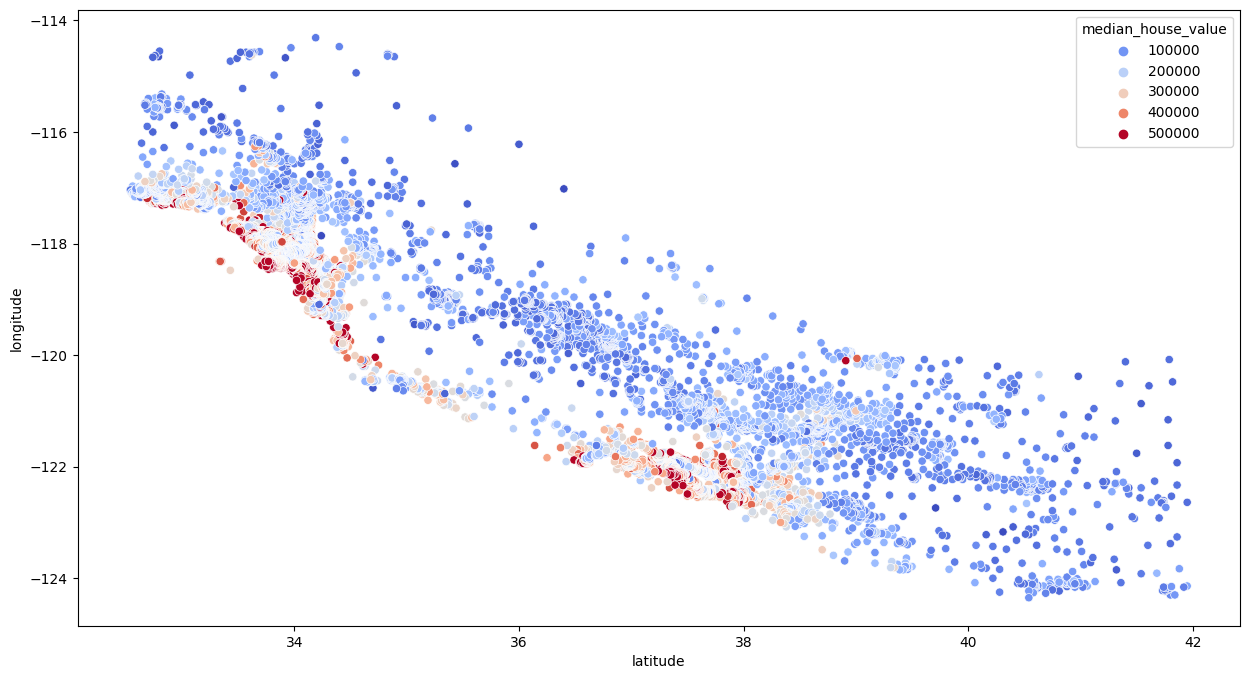

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")
plt.show()

# model

In [17]:
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [19]:
from sklearn.preprocessing import StandardScaler
# Crating a standard scaler object
scaler=StandardScaler()
# using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
# here using transform only to avoid data leakage
X_test=scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [23]:
reg.score(X_test,y_test)

0.6646301648400851

In [27]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# # Evaluate the model's performance
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy: {:.2f}%".format(acc*100))
# print("Precision: {:.2f}%".format(prec*100))
# print("Recall: {:.2f}%".format(rec*100))
# print("F1-Score: {:.2f}".format(f1))

## random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8200456495994526

In cross validation, we take the data and split it into k folds with K being a number. if we split into k = 5, we use all but 1 for training, and 1 for evuluation.  and this is repeated for all possible combinations

In [42]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 150, 200],
    "min_samples_split" : [2, 3],
    "max_depth" : [None, 2, 3, 4]  
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_ 

In [ ]:
forest.score(X_test, y_test)